## Sea ice classification with GMM (pixel based) - unsupervised
IPython notebook demo of the Gaussian Mixture Model (GMM) algorithm for sea ice classification (pixel based)
As part of the 2016 XSEDE Polar Hackathon. 

Contributing authors: Alek Petty, Andrew Barrett, Xin Miao, Phil McDowell, Vivek Balasubramanian

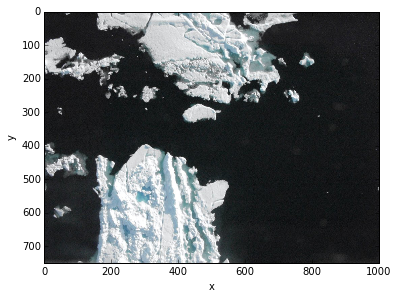

In [37]:
%matplotlib inline
from scipy import misc
from pylab import *
from skimage.segmentation import mark_boundaries

trainingPath="../../../../DATA/IMAGERY/XIN/TRAINING/"
filePath = "../../../../DATA/IMAGERY/XIN/"

iceTypes=4

img = misc.imread(filePath+'072610_00104.jpg')
fig1 = figure(figsize=(6, 6))
xlabel('x')
ylabel('y')
imshow(img)
plt.show()

In [38]:
#load and apply the Gaussian Mixture Model (GMM) classification scheme to one sea ice image.
from sklearn import mixture
#n_components is the number of surface types we want to find.
gmix = mixture.GMM(n_components=iceTypes, covariance_type='full')
#fit to image
gmix.fit(img.reshape((img.shape[0]*img.shape[1],3)))
#extract class means and cov
#this can be made a 'supervised' method by setting .means_ and .covars_ to mean/cov of samples
mean = gmix.means_
cov = gmix.covars_


In [39]:
# Sort the classification by mean spectral values 
# For consistency with later classifications
sort_indices = gmix.means_.argsort(axis = 0)
order = sort_indices[:, 0]
#print('\norder:', order)
gmix.means_ = gmix.means_[order,:]    
gmix.covars_ = gmix.covars_[order, :]
a=[gmix.weights_[x] for x in order]
gmix.weights_=a
gmix.means_
# show that the means are now in ascending order

array([[  23.25891244,   25.46563331,   27.04868767],
       [  83.53891307,   94.81080229,   96.74451278],
       [ 171.52209781,  187.35603321,  195.33324158],
       [ 216.31296595,  217.80096371,  219.6987186 ]])

In [40]:
#predict back to image
labeled_img = gmix.predict(img.reshape((img.shape[0]*img.shape[1],3))).\
    reshape(img.shape[0],img.shape[1])

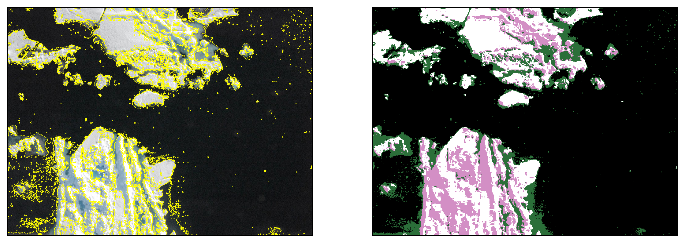

In [41]:
# Plot out the classification
fig2, ax = plt.subplots(1, 2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'}, 
                        figsize=(12, 6))
ax[0].imshow(mark_boundaries(img, labeled_img))
ax[1].imshow(labeled_img, cm.cubehelix)
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

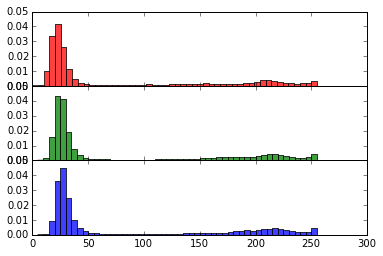

In [42]:
# Generate histograms to look into the image spectrum
x0 = img[:,:,0].flatten()
x1 = img[:,:,1].flatten()
x2 = img[:,:,2].flatten()
fig5, ax = plt.subplots(3, sharex=True, sharey=True)
n0, bins0, patches0 = ax[0].hist(x0, bins=50, normed=1, facecolor='red', alpha=0.75)
n1, bins1, patches1 = ax[1].hist(x1, bins=50, normed=1, facecolor='green', alpha=0.75)
n2, bins2, patches2 = ax[2].hist(x2, bins=50, normed=1, facecolor='blue', alpha=0.75)
for a in ax:
    a.set_ylim(0, 0.05)
fig5.subplots_adjust(hspace=0)
plt.show()

## Use the analysis from the previous image (generated using unsupervised GMM learning) to train the classification of another sea ice image... 

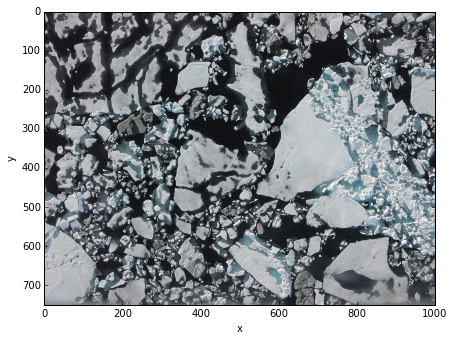

In [43]:
# Read in another sea ice image (from the same helicopter campaign)

img2 = misc.imread(filePath+"072610_00211.jpg")
fig6 = figure(figsize=(7, 6))
xlabel('x')
ylabel('y')
imshow(img2)
plt.show()

In [44]:
# label using the previous GMM model
labeled_img6 = gmix.predict(img2.reshape((img2.shape[0]*img2.shape[1],3))). \
    reshape(img2.shape[0],img2.shape[1])

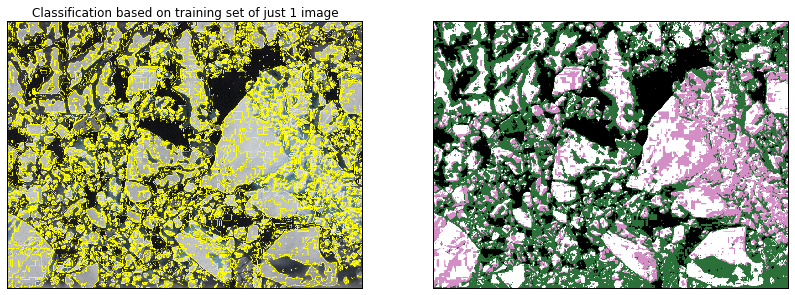

In [45]:
# Plot out this classification
fig7, ax = plt.subplots(1, 2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'}, 
                        figsize=(14, 6))
ax[0].imshow(mark_boundaries(img2, labeled_img6))
ax[1].imshow(labeled_img6, cmap=cm.cubehelix)
ax[0].set_title("Classification based on training set of just 1 image")
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

Train the algorithm (GMM) with a number of images 

In [46]:
# Let's read in multiple images

#number of images from the training directory to use... 
num_files=3

from glob import glob
files=glob(trainingPath+'*.jpg')
imgAll = misc.imread(files[0]).reshape((-1, 3))
print num_files, size(files)
iterfiles = iter(files)
next(iterfiles)

# Concatenate images into one big image
for file in files[0:num_files]:
    imgT = misc.imread(file).reshape((-1, 3))
    imgAll=np.concatenate((imgT, imgAll))
imgAll.shape

3 12


(3000000, 3)

In [47]:
gmixAll = mixture.GMM(n_components=iceTypes, covariance_type='full')
gmixAll.fit(imgAll)
#extract class means and cov
#this can be made a 'supervised' method by setting .means_ and .covars_ to mean/cov of samples
mean2 = gmixAll.means_
cov2 = gmixAll.covars_

In [48]:
sort_indicesAll = gmixAll.means_.argsort(axis = 0)
orderAll = sort_indicesAll[:, 0]
#print('\norder:', order)
gmixAll.means_ = gmixAll.means_[orderAll,:]    
gmixAll.covars_ = gmix.covars_[orderAll, :]
aAll = gmixAll.means_[orderAll,:]
aAll=[gmixAll.weights_[x] for x in orderAll]
gmixAll.weights_=aAll
gmix.means_

[[  83.53891307   94.81080229   96.74451278]
 [ 171.52209781  187.35603321  195.33324158]
 [  23.25891244   25.46563331   27.04868767]
 [ 216.31296595  217.80096371  219.6987186 ]]


array([[  23.25891244,   25.46563331,   27.04868767],
       [  83.53891307,   94.81080229,   96.74451278],
       [ 171.52209781,  187.35603321,  195.33324158],
       [ 216.31296595,  217.80096371,  219.6987186 ]])

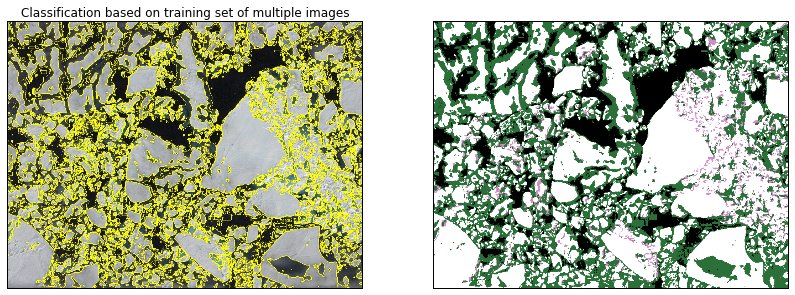

In [49]:
labeled_img7 = gmixAll.predict(img2.reshape((-1,3))). \
    reshape(img2.shape[0],img2.shape[1])
fig8, ax = plt.subplots(1, 2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'}, 
                        figsize=(14, 6))
ax[0].imshow(mark_boundaries(img2, labeled_img7))
ax[1].imshow(labeled_img7, cmap=cm.cubehelix)
ax[0].set_title("Classification based on training set of multiple images")
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

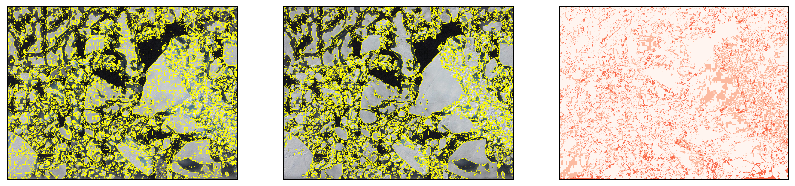

In [50]:

fig9, ax = plt.subplots(1, 3, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'}, 
                        figsize=(14, 6))
ax[0].imshow(mark_boundaries(img2, labeled_img6))
ax[1].imshow(mark_boundaries(img2, labeled_img7))
ax[2].imshow(labeled_img7-labeled_img6, cmap=cm.Reds, vmin=0, vmax=4)
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

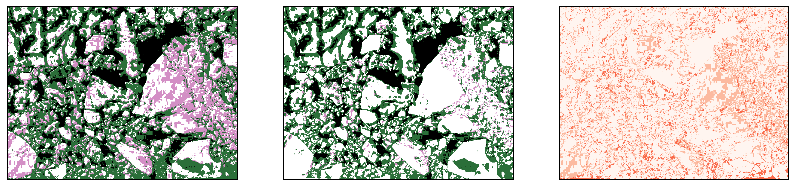

In [51]:
fig9, ax = plt.subplots(1, 3, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'}, 
                        figsize=(14, 6))
ax[0].imshow(labeled_img6, cmap=cm.cubehelix)
ax[1].imshow(labeled_img7, cmap=cm.cubehelix)
ax[2].imshow(labeled_img7-labeled_img6, cmap=cm.Reds, vmin=0, vmax=4)
for a in ax:
    a.set_xticks(())
    a.set_yticks(())
plt.show()

In [52]:
labeled_img7

array([[1, 1, 0, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       ..., 
       [3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1]])

In [53]:
#test which is best - trained with one other image, multiple other images, or a supervised dataset.
# how to judge? Manually selecting I guess..